In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance



In [2]:
# Lees de CSV-bestand in (vervang 'data.csv' met de juiste pad naar je bestand)
# df = pd.read_csv('data.csv', sep=';')
# df = pd.read_csv('cleaned_data.csv', sep=';')
# df = pd.read_csv('cleaned_and_featured_data.csv', sep=';')
# df = pd.read_csv('cleaned_and_featured_data_males.csv', sep=';')
df = pd.read_csv('cleaned_and_featured_data_females.csv', sep=';')

# Verken de data (optioneel)
print(df.head())
print(df.info())

# Selecteer de features (X) en de target variabele (y)
# X = df.drop(['HeartDisease', 'CaseNumber', 'LastName', 'PostCode'], axis=1)
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

# Converteer categorische kolommen naar numeriek (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)


   Age ChestPainType  RestingBP Cholesterol  FastingBS  RestingECG  MaxHR  \
0   46           ASY        100           H          1           1    133   
1   56           NAP        125           H          1           0     98   
2   42           ASY        105           H          1           0    128   
3   38           NAP        100           H          0           0    179   
4   56           ASY        115           H          1           1     82   

   ExerciseAngina _ True  Oldpeak ST_Slope  HeartDisease  
0                      0       26     Flat             1  
1                      0       20     Flat             1  
2                      1       15     Down             1  
3                      0       11       Up             0  
4                      0       10       Up             1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                

In [3]:
# Splits de data in een train- en testset (80% trainen, 20% testen)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Kies het Gradient Boosting model
model = GradientBoostingClassifier()

# Train het model
model.fit(X_train, y_train)


GradientBoostingClassifier()

In [5]:
# Voorspel met de testdata
y_pred = model.predict(X_test)  # Voorspel met de testdata
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Krijg de voorspelde waarschijnlijkheden

# Bereken de evaluatie metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)

# Print de evaluatie metrics
print(f"Gradient Boosting - Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.4f}, F1 Score: {f1:.4f}")


Gradient Boosting - Accuracy: 0.9167, ROC AUC: 0.9718, F1 Score: 0.9326


In [6]:
# Maak een DataFrame met de werkelijke en voorspelde waarden
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Predicted Probability': y_pred_proba
})

# Selecteer een willekeurige sample van 20 rijen
random_sample = results_df.sample(n=20, random_state=42)

# Print de willekeurige sample
print(random_sample)


     Actual  Predicted  Predicted Probability
60        0          0               0.074305
213       0          0               0.083193
192       0          0               0.316608
2         1          1               0.971738
211       0          0               0.138940
39        1          1               0.797503
220       0          0               0.026246
97        0          0               0.009036
654       1          1               0.883290
259       1          1               0.752975
672       1          1               0.979975
714       1          1               0.985189
174       1          1               0.966368
552       1          0               0.448676
291       1          1               0.881910
250       0          0               0.041430
210       1          1               0.664867
596       1          1               0.964619
70        0          0               0.089532
382       1          1               0.949308


# Confusion Matrix

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           49            6
Actual 1            6           83


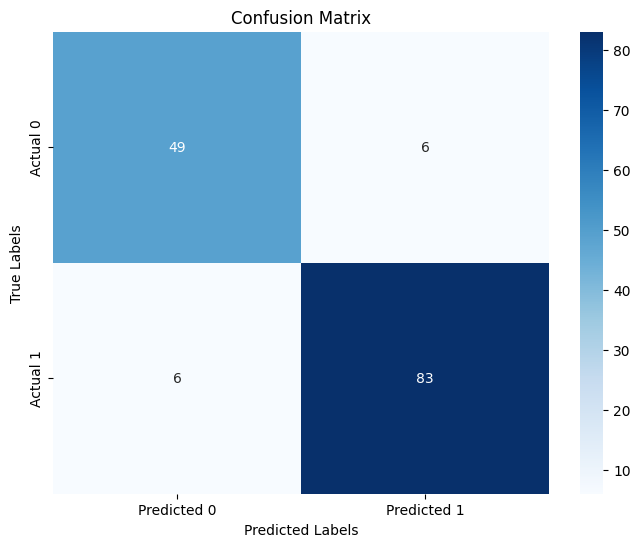

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        55
           1       0.93      0.93      0.93        89

    accuracy                           0.92       144
   macro avg       0.91      0.91      0.91       144
weighted avg       0.92      0.92      0.92       144



In [7]:
# Bereken de confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Zet de confusion matrix om in een DataFrame
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Print de confusion matrix
print("Confusion Matrix:")
print(cm_df)

# Visualiseer de confusion matrix met Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# print classification report
print(classification_report(y_test, y_pred))

In [8]:
from sklearn.model_selection import GridSearchCV

# Definieer de hyperparameters en de waarden die je wilt testen
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
}

# Configureer de GridSearchCV
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), 
                           param_grid=param_grid, 
                           scoring='roc_auc', 
                           cv=5, 
                           verbose=2)

# Voer de Grid Search uit
grid_search.fit(X_train, y_train)

# Toon de beste hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Train het model met de beste hyperparameters
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth

In [9]:
# Maak voorspellingen met het beste model
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

# Maak een DataFrame met de werkelijke en voorspelde waarden
results_df_best = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_best,
    'Predicted Probability': y_pred_proba_best
})

# Selecteer een willekeurige sample van 20 rijen
random_sample_best = results_df_best.sample(n=20, random_state=42)

# Print de willekeurige sample
print(random_sample_best)


     Actual  Predicted  Predicted Probability
60        0          0               0.327762
213       0          0               0.183763
192       0          0               0.369845
2         1          1               0.879324
211       0          0               0.183763
39        1          1               0.835042
220       0          0               0.135400
97        0          0               0.147104
654       1          1               0.709388
259       1          1               0.569834
672       1          1               0.899050
714       1          1               0.885240
174       1          1               0.886535
552       1          0               0.472360
291       1          1               0.835571
250       0          0               0.149637
210       1          1               0.634508
596       1          1               0.895385
70        0          0               0.243009
382       1          1               0.892114


# Confusion Matrix

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           47            8
Actual 1            5           84


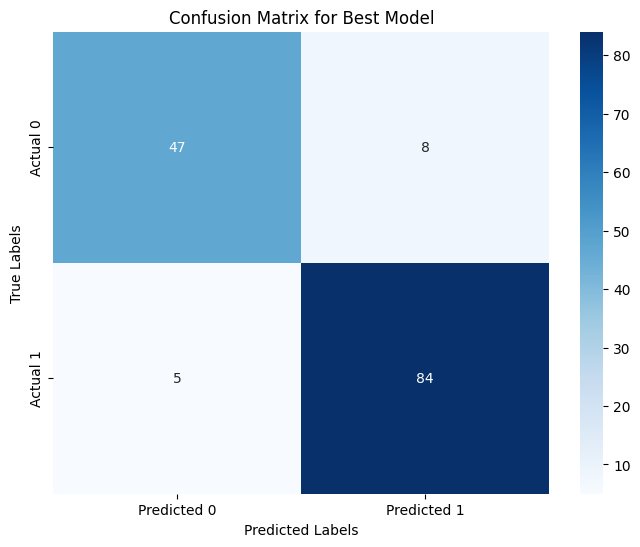

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        55
           1       0.93      0.93      0.93        89

    accuracy                           0.92       144
   macro avg       0.91      0.91      0.91       144
weighted avg       0.92      0.92      0.92       144



In [10]:
# Bereken de confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)

# Zet de confusion matrix om in een DataFrame
cm_df_best = pd.DataFrame(cm_best, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Print de confusion matrix
print("Confusion Matrix:")
print(cm_df_best)

# Visualiseer de confusion matrix met Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df_best, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Best Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# print classification report
print(classification_report(y_test, y_pred))


Permutation Importance:
                         Importance
ST_Slope_Up            1.414352e-01
Oldpeak                4.560185e-02
ChestPainType_NAP      1.365741e-02
ExerciseAngina _ True  1.134259e-02
ChestPainType_ATA      4.861111e-03
FastingBS              4.166667e-03
ST_Slope_Flat          4.166667e-03
MaxHR                  3.935185e-03
Cholesterol_M          2.777778e-03
RestingBP              6.944444e-04
ChestPainType_TA       4.629630e-04
Cholesterol_L          0.000000e+00
Age                   -1.110223e-17
RestingECG            -8.564815e-03


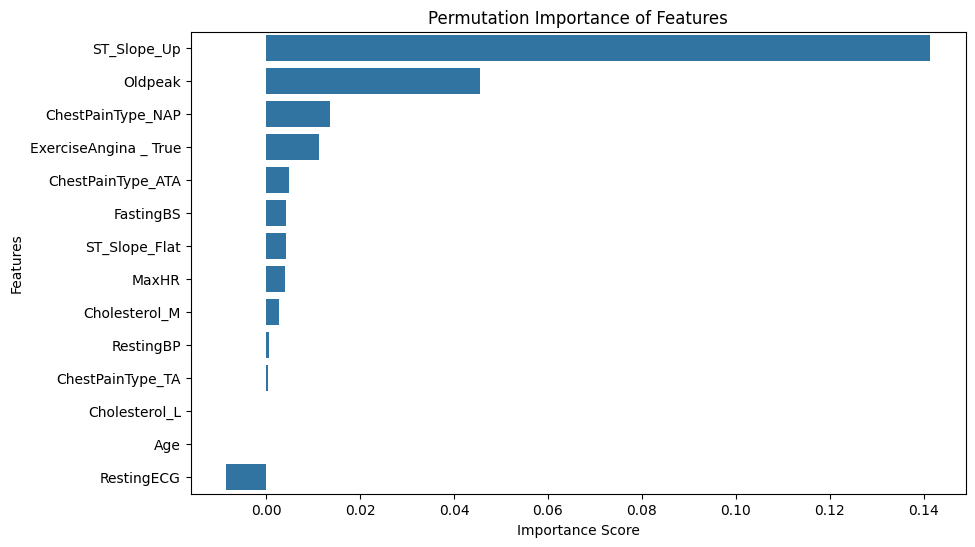

In [11]:
# Stap 9: Permutation Importance
result = permutation_importance(best_model, X_test, y_test, n_repeats=30, random_state=42)

# Zet de resultaten om in een DataFrame
importance_df = pd.DataFrame(result.importances_mean, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

# Print de permutation importance
print("Permutation Importance:")
print(importance_df)

# Visualiseer de permutation importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df['Importance'], y=importance_df.index)
plt.title('Permutation Importance of Features')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

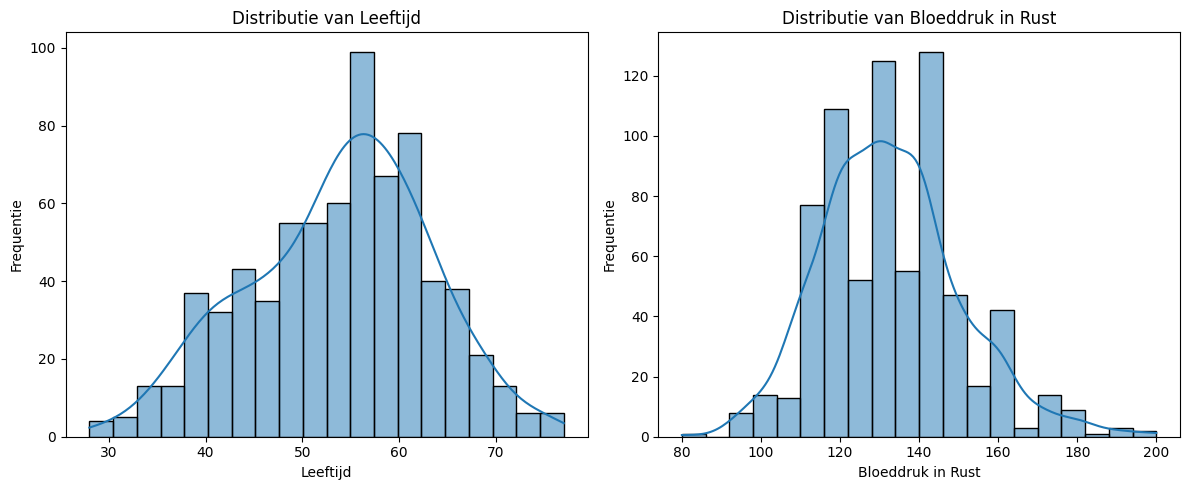

In [12]:
# Visualiseer de distributie van 'Age'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distributie van Leeftijd')
plt.xlabel('Leeftijd')
plt.ylabel('Frequentie')

# Visualiseer de distributie van 'RestingBP'
plt.subplot(1, 2, 2)
sns.histplot(df['RestingBP'], bins=20, kde=True)
plt.title('Distributie van Bloeddruk in Rust')
plt.xlabel('Bloeddruk in Rust')
plt.ylabel('Frequentie')

plt.tight_layout()
plt.show()


# Drempelaanpassing

Classification Report na Drempelaanpassing:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        55
           1       0.85      1.00      0.92        89

    accuracy                           0.89       144
   macro avg       0.92      0.85      0.87       144
weighted avg       0.91      0.89      0.88       144

Willekeurige Sample van 10 Rijen na Drempelaanpassing:
     Actual  Predicted  Predicted Probability
60        0          1               0.327762
213       0          0               0.183763
192       0          1               0.369845
2         1          1               0.879324
211       0          0               0.183763
39        1          1               0.835042
220       0          0               0.135400
97        0          0               0.147104
654       1          1               0.709388
259       1          1               0.569834
Confusion Matrix na Drempelaanpassing:
          Predicted 0  Predic

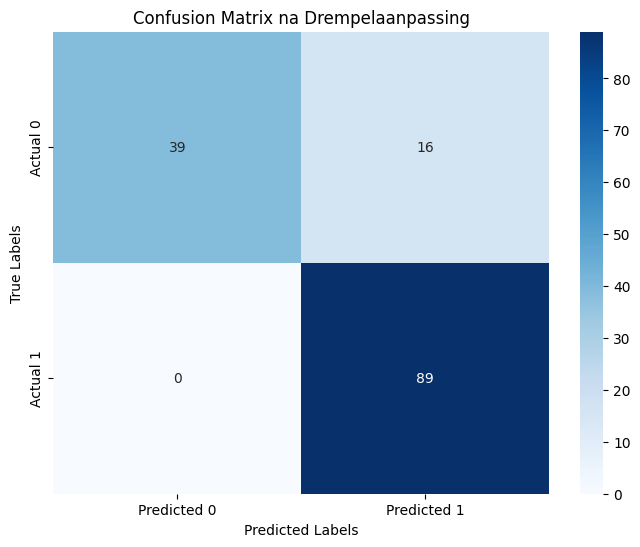

In [19]:
# Voorspellingen maken
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

# Pas de drempel aan (bijv. naar 0.3)
threshold = 0.31
y_pred_adjusted = (y_pred_proba_best >= threshold).astype(int)

# Evalueer de resultaten met de aangepaste drempel
print("Classification Report na Drempelaanpassing:")
print(classification_report(y_test, y_pred_adjusted))

# Maak een DataFrame met de werkelijke en voorspelde waarden
results_df_adjusted = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_adjusted,
    'Predicted Probability': y_pred_proba_best
})

# Selecteer een willekeurige sample van 10 rijen
random_sample_adjusted = results_df_adjusted.sample(n=10, random_state=42)

# Print de willekeurige sample
print("Willekeurige Sample van 10 Rijen na Drempelaanpassing:")
print(random_sample_adjusted)

# Bereken de confusion matrix
cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)

# Zet de confusion matrix om in een DataFrame
cm_df_adjusted = pd.DataFrame(cm_adjusted, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Print de confusion matrix voor het aangepaste model
print("Confusion Matrix na Drempelaanpassing:")
print(cm_df_adjusted)

# Visualiseer de confusion matrix voor het aangepaste model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df_adjusted, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix na Drempelaanpassing')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
